In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
from scipy.cluster.hierarchy import linkage, leaves_list, dendrogram
from scipy.spatial.distance import pdist, squareform
from qmplot import qqplot
%matplotlib inline 
import pylab as py
import statistics
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
import statsmodels.stats as ss

# Clustering

Make df of data

In [2]:
expression_df = pd.read_csv("all_annotated.csv")
expression_df

,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D
0,FBtr0114258,CR41571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
1,FBtr0346770,CG45784,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
2,FBtr0302440,CR12798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
3,FBtr0302347,CR40182,23.712564,11.967821,20.767498,13.566818,18.802116,26.802691,22.819895,11.682728,21.894249,13.922059,16.482141,12.622680,31.800016,22.883186,14.330216,17.20257
4,FBtr0346769,CG45783,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34713,FBtr0114187,CR40502,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
34714,FBtr0304147,CR40719,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
34715,FBtr0114216,CR40679,2.011199,0.000000,7.994137,2.064200,3.141665,0.000000,1.519102,9.190801,13.475658,1.771435,4.649351,7.004174,6.904506,0.835856,1.151747,1.98591
34716,FBtr0114222,CR40743,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000


Limit the dataset to genes with a median expression across samples of greater than zero

In [3]:
medians = expression_df.median(axis=1)
expression_df["medians"] = medians
expression_df

,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D,medians
0,FBtr0114258,CR41571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
1,FBtr0346770,CG45784,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
2,FBtr0302440,CR12798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
3,FBtr0302347,CR40182,23.712564,11.967821,20.767498,13.566818,18.802116,26.802691,22.819895,11.682728,21.894249,13.922059,16.482141,12.622680,31.800016,22.883186,14.330216,17.20257,18.002343
4,FBtr0346769,CG45783,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34713,FBtr0114187,CR40502,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
34714,FBtr0304147,CR40719,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
34715,FBtr0114216,CR40679,2.011199,0.000000,7.994137,2.064200,3.141665,0.000000,1.519102,9.190801,13.475658,1.771435,4.649351,7.004174,6.904506,0.835856,1.151747,1.98591,2.037699
34716,FBtr0114222,CR40743,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000


In [4]:
zero = expression_df[expression_df["medians"] == 0].index
expression_df.drop(zero, inplace=True)
expression_df

,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D,medians
3,FBtr0302347,CR40182,23.712564,11.967821,20.767498,13.566818,18.802116,26.802691,22.819895,11.682728,21.894249,13.922059,16.482141,12.622680,31.800016,22.883186,14.330216,17.202570,18.002343
8,FBtr0113885,Parp,10.997173,0.000000,0.000000,0.000000,14.805335,0.000000,17.601667,10.729349,0.000000,0.000000,14.888651,14.518989,20.343670,4.087385,0.000000,25.284622,7.408367
9,FBtr0301810,Alg-2,19.067924,0.000000,14.832370,27.793905,22.290230,7.846396,13.839143,12.905621,18.570707,2.919183,18.402807,26.431841,27.464781,7.432775,7.349162,22.792486,16.617589
10,FBtr0113895,Tim17b,6.315716,3.935390,6.244336,69.942917,67.208557,7.605970,74.979057,53.740307,44.747662,16.834093,52.928318,77.950165,80.805580,31.863932,49.121342,77.608521,51.024830
11,FBtr0345179,Tim17b,119.325905,11.631035,120.137291,75.778061,72.815582,123.849213,81.234352,59.657963,48.480839,18.238514,57.343983,86.686310,87.546967,34.522255,53.219402,84.936600,74.296821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34663,FBtr0100884,mt:Cyt-b,33.341347,1.056151,9.832860,414.872559,102.529091,25.448748,71.750275,123.175087,119.770973,0.672975,48.309597,71.916695,237.404190,43.700970,75.445251,167.244049,71.833485
34665,FBtr0100886,mt:ND1,25.209366,0.638430,21.281239,517.077271,326.313934,54.783924,360.265900,222.375244,306.410706,2.153615,200.718567,392.145020,433.656708,21.621773,91.902115,681.475891,211.546905
34667,FBtr0100888,mt:lrRNA,2339.313232,34.080185,927.591858,4944.716797,2251.114990,593.744141,2493.088379,1651.994141,2578.825439,76.555481,2175.402344,3736.670654,122.910004,451.278412,692.211304,4556.642090,1913.698243
34684,FBtr0114261,CR41590,0.072563,0.000000,0.096390,0.102807,0.000000,0.000000,0.000000,0.126345,0.902268,0.000000,0.000000,0.162814,0.165381,0.000000,0.000000,0.052507,0.026254


Apply a log2(FPKM + 0.1) transformation to the data

Remove first two name columns from dataframe

In [5]:
transform_df = expression_df.iloc[:, 2:]
transform_df

,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D,medians
3,23.712564,11.967821,20.767498,13.566818,18.802116,26.802691,22.819895,11.682728,21.894249,13.922059,16.482141,12.622680,31.800016,22.883186,14.330216,17.202570,18.002343
8,10.997173,0.000000,0.000000,0.000000,14.805335,0.000000,17.601667,10.729349,0.000000,0.000000,14.888651,14.518989,20.343670,4.087385,0.000000,25.284622,7.408367
9,19.067924,0.000000,14.832370,27.793905,22.290230,7.846396,13.839143,12.905621,18.570707,2.919183,18.402807,26.431841,27.464781,7.432775,7.349162,22.792486,16.617589
10,6.315716,3.935390,6.244336,69.942917,67.208557,7.605970,74.979057,53.740307,44.747662,16.834093,52.928318,77.950165,80.805580,31.863932,49.121342,77.608521,51.024830
11,119.325905,11.631035,120.137291,75.778061,72.815582,123.849213,81.234352,59.657963,48.480839,18.238514,57.343983,86.686310,87.546967,34.522255,53.219402,84.936600,74.296821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34663,33.341347,1.056151,9.832860,414.872559,102.529091,25.448748,71.750275,123.175087,119.770973,0.672975,48.309597,71.916695,237.404190,43.700970,75.445251,167.244049,71.833485
34665,25.209366,0.638430,21.281239,517.077271,326.313934,54.783924,360.265900,222.375244,306.410706,2.153615,200.718567,392.145020,433.656708,21.621773,91.902115,681.475891,211.546905
34667,2339.313232,34.080185,927.591858,4944.716797,2251.114990,593.744141,2493.088379,1651.994141,2578.825439,76.555481,2175.402344,3736.670654,122.910004,451.278412,692.211304,4556.642090,1913.698243
34684,0.072563,0.000000,0.096390,0.102807,0.000000,0.000000,0.000000,0.126345,0.902268,0.000000,0.000000,0.162814,0.165381,0.000000,0.000000,0.052507,0.026254


log2(FPKM + 0.1) transform

In [6]:
transform_df = np.log2(transform_df + 0.1)
transform_df

,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D,medians
3,4.573651,3.593093,4.383186,3.772605,4.240476,4.749679,4.518529,3.558602,4.459054,3.809626,4.051558,3.669331,4.995485,4.522507,3.851021,4.112914,4.178105
8,3.472120,-3.321928,-3.321928,-3.321928,3.897757,-3.321928,4.145813,3.436875,-3.321928,-3.321928,3.905799,3.869772,4.353582,2.066050,-3.321928,4.665883,2.908499
9,4.260622,-3.321928,3.900371,4.801878,4.484797,2.990301,3.801070,3.701063,4.222705,1.594158,4.209672,4.729653,4.784754,2.913181,2.897078,4.516802,4.063295
10,2.681610,2.012708,2.665469,6.130167,6.072718,2.945977,6.230339,5.750615,5.486961,4.081859,5.728691,6.286330,6.338167,4.998373,5.621212,6.280001,5.675952
11,6.899972,3.552258,6.909741,6.245611,6.188155,6.953605,6.345793,5.901059,5.602316,4.196805,5.844084,6.439396,6.453632,5.113628,5.736589,6.410012,6.217169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34663,5.063561,0.209330,3.312209,8.696872,6.681296,4.675181,6.166922,6.945737,6.905339,-0.371506,5.597221,6.170259,7.891809,5.452891,6.239269,7.386673,6.168592
34665,4.661599,-0.437467,4.418274,9.014515,8.350559,5.778312,8.493319,7.797501,8.259794,1.172241,7.649749,8.615611,8.760742,4.441070,6.523595,9.412730,7.725516
34667,11.191931,5.095088,9.857502,12.271701,11.136488,9.213941,11.283776,10.690080,11.332554,6.260317,11.087133,11.867576,6.942632,8.818194,9.435277,12.153787,10.902223
34684,-2.534805,-3.321928,-2.348207,-2.301821,-3.321928,-3.321928,-3.321928,-2.143405,0.003268,-3.321928,-3.321928,-1.927886,-1.913863,-3.321928,-3.321928,-2.713053,-2.985605


Merge transform df back to names

In [7]:
names_df = expression_df.iloc[:, :2]
names_df

,t_name,gene_name
3,FBtr0302347,CR40182
8,FBtr0113885,Parp
9,FBtr0301810,Alg-2
10,FBtr0113895,Tim17b
11,FBtr0345179,Tim17b
...,...,...
34663,FBtr0100884,mt:Cyt-b
34665,FBtr0100886,mt:ND1
34667,FBtr0100888,mt:lrRNA
34684,FBtr0114261,CR41590


In [50]:
df_merge = pd.concat([names_df, transform_df],axis =1)
df_merge

,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D,medians
3,FBtr0302347,CR40182,4.573651,3.593093,4.383186,3.772605,4.240476,4.749679,4.518529,3.558602,4.459054,3.809626,4.051558,3.669331,4.995485,4.522507,3.851021,4.112914,4.178105
8,FBtr0113885,Parp,3.472120,-3.321928,-3.321928,-3.321928,3.897757,-3.321928,4.145813,3.436875,-3.321928,-3.321928,3.905799,3.869772,4.353582,2.066050,-3.321928,4.665883,2.908499
9,FBtr0301810,Alg-2,4.260622,-3.321928,3.900371,4.801878,4.484797,2.990301,3.801070,3.701063,4.222705,1.594158,4.209672,4.729653,4.784754,2.913181,2.897078,4.516802,4.063295
10,FBtr0113895,Tim17b,2.681610,2.012708,2.665469,6.130167,6.072718,2.945977,6.230339,5.750615,5.486961,4.081859,5.728691,6.286330,6.338167,4.998373,5.621212,6.280001,5.675952
11,FBtr0345179,Tim17b,6.899972,3.552258,6.909741,6.245611,6.188155,6.953605,6.345793,5.901059,5.602316,4.196805,5.844084,6.439396,6.453632,5.113628,5.736589,6.410012,6.217169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34663,FBtr0100884,mt:Cyt-b,5.063561,0.209330,3.312209,8.696872,6.681296,4.675181,6.166922,6.945737,6.905339,-0.371506,5.597221,6.170259,7.891809,5.452891,6.239269,7.386673,6.168592
34665,FBtr0100886,mt:ND1,4.661599,-0.437467,4.418274,9.014515,8.350559,5.778312,8.493319,7.797501,8.259794,1.172241,7.649749,8.615611,8.760742,4.441070,6.523595,9.412730,7.725516
34667,FBtr0100888,mt:lrRNA,11.191931,5.095088,9.857502,12.271701,11.136488,9.213941,11.283776,10.690080,11.332554,6.260317,11.087133,11.867576,6.942632,8.818194,9.435277,12.153787,10.902223
34684,FBtr0114261,CR41590,-2.534805,-3.321928,-2.348207,-2.301821,-3.321928,-3.321928,-3.321928,-2.143405,0.003268,-3.321928,-3.321928,-1.927886,-1.913863,-3.321928,-3.321928,-2.713053,-2.985605


Cluster the data matrix for both genes and samples on their patterns of expression (so both the rows and columns of the matrix), and plot a heatmap of the gene expression data.

Linkage matrix

In [9]:
linkage_matrix = linkage(transform_df, 'ward')
linkage_matrix

array([[5.31400000e+03, 5.31500000e+03, 0.00000000e+00, 2.00000000e+00],
       [8.46900000e+03, 8.47000000e+03, 0.00000000e+00, 2.00000000e+00],
       [7.71000000e+03, 7.71100000e+03, 0.00000000e+00, 2.00000000e+00],
       ...,
       [1.72190000e+04, 1.72200000e+04, 4.29699070e+02, 3.29400000e+03],
       [1.72180000e+04, 1.72210000e+04, 6.11873796e+02, 5.31900000e+03],
       [1.72220000e+04, 1.72230000e+04, 1.06649515e+03, 8.61300000e+03]])

# Clustermap

/Users/cmdb/miniconda3/lib/python3.7/site-packages/seaborn/matrix.py:659: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


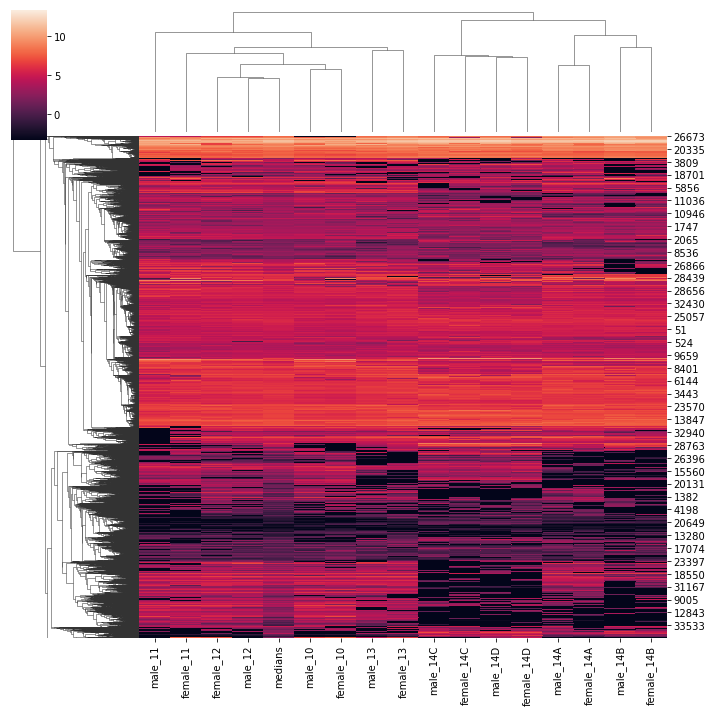

In [10]:
sns.clustermap(transform_df)

# Dendrogram

/Users/cmdb/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  import sys


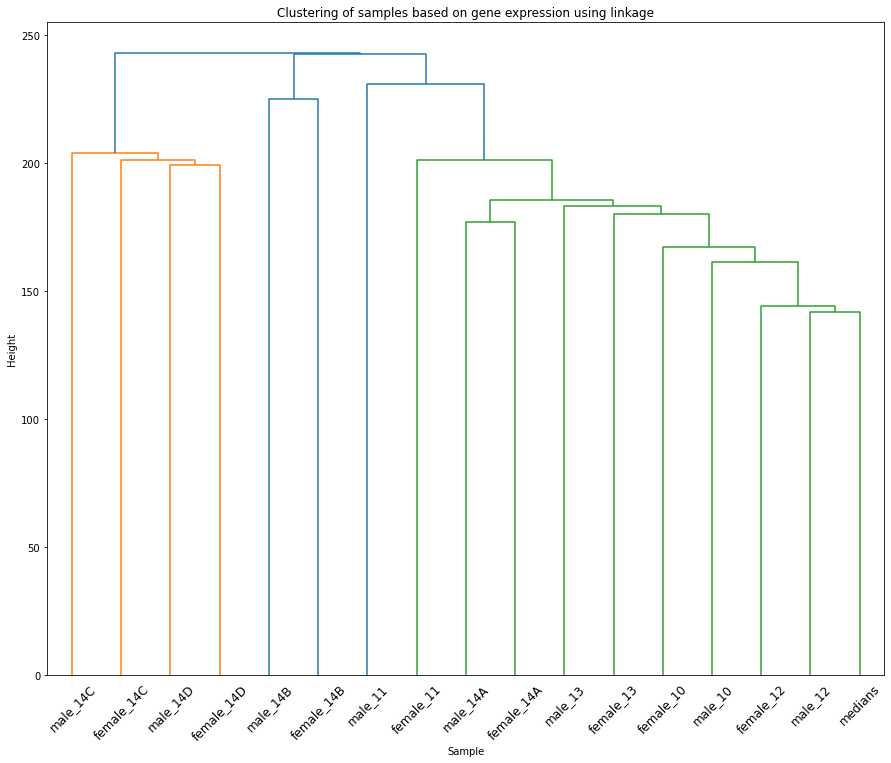

In [11]:
df = linkage(transform_df.T)
color_threshold= 0.85*max(df[:,2])
fig, ax = plt.subplots(figsize=(15,12))
dn = dendrogram(df, labels=transform_df.columns, color_threshold=color_threshold, ax=ax)
plt.xlabel('Sample')
plt.ylabel('Height')
plt.xticks(Rotation=45)
plt.title('Clustering of samples based on gene expression using linkage')
plt.show()

# Differential expression 

# QQ plot

In [72]:
expression_df = df_merge.set_index(df_merge.columns[0])
expression_df = expression_df.iloc[:,1:-1]
expression_df = expression_df.T

# add sex as variable
expression_df['sex'] = [x.split('_')[0] for x in expression_df.index]
expression_df['stage'] = [int(x.split('_')[1][:2]) for x in expression_df.index]
expression_df

#Do regression

p_values_no_sex = []
b_values_no_sex = []

for transcript_name, column_data in expression_df.iteritems():
    if transcript_name == 'sex' or transcript_name == 'stage':
        continue
    model = smf.ols("{} ~ stage".format(transcript_name), data=expression_df)
    results = model.fit()

    p_values_no_sex.append(results.pvalues['stage'])
    b_values_no_sex.append(results.params['stage'])

expression_df

t_name,FBtr0302347,FBtr0113885,FBtr0301810,FBtr0113895,FBtr0345179,FBtr0301812,FBtr0113990,FBtr0113989,FBtr0078962,FBtr0078964,...,FBtr0100870,FBtr0100877,FBtr0100879,FBtr0100884,FBtr0100886,FBtr0100888,FBtr0114261,FBtr0114216,sex,stage
male_10,4.573651,3.472120,4.260622,2.681610,6.899972,2.705093,4.756461,3.146474,-3.321928,3.463929,...,-3.321928,2.776468,3.492078,5.063561,4.661599,11.191931,-2.534805,1.078063,male,10
male_11,3.593093,-3.321928,-3.321928,2.012708,3.552258,-3.321928,-3.321928,-3.321928,-3.321928,4.239056,...,-3.321928,-1.470133,-1.024012,0.209330,-0.437467,5.095088,-3.321928,-3.321928,male,11
male_12,4.383186,-3.321928,3.900371,2.665469,6.909741,3.387643,-3.321928,4.653752,-3.321928,4.670246,...,-3.321928,3.670053,2.117857,3.312209,4.418274,9.857502,-2.348207,3.016877,male,12
male_13,3.772605,-3.321928,4.801878,6.130167,6.245611,4.529754,4.852629,4.093288,-3.321928,4.083719,...,-3.321928,5.763758,6.549579,8.696872,9.014515,12.271701,-2.301821,1.113834,male,13
male_14A,4.240476,3.897757,4.484797,6.072718,6.188155,4.658374,4.892474,2.507524,3.465782,4.078810,...,5.247958,5.726288,6.448643,6.681296,8.350559,11.136488,-3.321928,1.696735,male,14
male_14B,4.749679,-3.321928,2.990301,2.945977,6.953605,4.435483,-3.321928,-3.321928,4.839966,-3.321928,...,-3.321928,2.676730,4.501407,4.675181,5.778312,9.213941,-3.321928,-3.321928,male,14
male_14C,4.518529,4.145813,3.801070,6.230339,6.345793,5.110117,4.421782,-3.321928,6.834119,3.484193,...,5.119850,5.723819,6.193772,6.166922,8.493319,11.283776,-3.321928,0.695194,male,14
male_14D,3.558602,3.436875,3.701063,5.750615,5.901059,4.143877,2.423376,3.733928,7.222319,-3.321928,...,4.603723,3.962273,5.823686,6.945737,7.797501,10.690080,-2.143405,3.215803,male,14
female_10,4.459054,-3.321928,4.222705,5.486961,5.602316,3.885497,4.157226,3.636828,-3.321928,4.533838,...,2.247168,3.427259,5.372933,6.905339,8.259794,11.332554,0.003268,3.762950,female,10
female_11,3.809626,-3.321928,1.594158,4.081859,4.196805,2.035947,-3.321928,-3.321928,-3.321928,3.095164,...,-3.321928,-0.163229,-1.374355,-0.371506,1.172241,6.260317,-3.321928,0.904145,female,11


In [94]:
# xs = [x/len(p_values_no_sex) for x in range(1, len(p_values_no_sex)+1)] # expected p_values
# fig, ax = plt.subplots()
# ax.scatter(-1*np.log10(xs), -1*np.log10(sorted(p_values_no_sex)))
# plt.show()

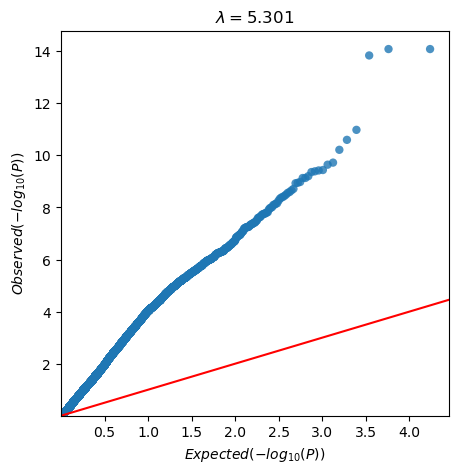

In [71]:
ax = qqplot(data=p_values_no_sex)

# List of differentially expressed genes, with and without sex as a covariate

In [84]:
#no_sex
#make a df of gene names, p_values, b_values 
nosexDF = pd.DataFrame(p_values_no_sex,difexpdf.index)
nosexDF.rename(columns={0:"p_values"}, inplace=True)
nosexDF = nosexDF.assign(b_values = b_values_no_sex)
nosexDF

,p_values,b_values
gene_name,,
CR40182,0.735893,0.026464
Parp,0.162378,0.880440
Alg-2,0.263080,0.388746
Tim17b,0.031521,0.542177
Tim17b,0.221445,0.201195
...,...,...
mt:Cyt-b,0.049018,0.820108
mt:ND1,0.051185,0.942403
mt:lrRNA,0.546605,0.231565


In [87]:
#sort df based on p_values
nosexDF_sort = nosexDF.sort_values(by=["p_values"])
nosexDF_sort

,p_values,b_values
gene_name,,
Ppa,8.260525e-15,2.183072
Ppa,8.260525e-15,2.183072
Ppa,1.454301e-14,2.150359
CG14915,1.047712e-11,2.852146
CG8960,2.536184e-11,1.740305
...,...,...
RpS14a,9.985308e-01,0.000630
CG2924,9.987745e-01,-0.000434
CG7215,9.991114e-01,0.000579


In [88]:
#make df of significant p_values (FDR < 10%) 
nosexDF_sig = nosexDF_sort.loc[nosexDF_sort["p_values"] < 0.1]
nosexDF_sig

,p_values,b_values
gene_name,,
Ppa,8.260525e-15,2.183072
Ppa,8.260525e-15,2.183072
Ppa,1.454301e-14,2.150359
CG14915,1.047712e-11,2.852146
CG8960,2.536184e-11,1.740305
...,...,...
CycY,9.955603e-02,0.068285
Ns3,9.979743e-02,-0.892791
Neb-cGP,9.982489e-02,0.178734


In [90]:
#make a list of the significant genes
index_list_no_sex = nosexDF_sig.index.tolist()
print(index_list_no_sex)

['Ppa', 'Ppa', 'Ppa', 'CG14915', 'CG8960', 'term', 'CG7271', 'CG34214', 'Dtg', 'CG6770', 'twi', 'twi', 'hkb', 'Nrt', 'CG2129', 'endos', 'sala', 'Ilp4', 'CR45270', 'D', 'CG13427', 'spri', 'mira', 'CG13454', 'CR45270', 'endos', 'Bsg25D', 'CG43725', 'D', 'link', 'CG4164', 'CR45270', 'Tcp-1zeta', 'Cys', 'brk', 'CG45099', 'Jafrac1', 'mip40', 'CG8026', 'Kr', 'dhd', 'CG45085', 'CR44676', 'Bx', 'Kr', 'CG17249', 'GILT2', 'CG6293', 'CG5059', 'GstD3', 'spo', 'CG8635', 'spo', 'CG10932', 'CG1218', 'Hsp26', 'Hsp26', 'CG14317', 'cbt', 'CG6180', 'CG10932', 'retn', 'cN-IIIB', 'Aats-tyr', 'CG9953', 'CG5569', 'CG4440', 'CG10035', 'png', 'Pmm45A', 'lost', 'aret', 'CG14937', 'CSN7', 'mtrm', 'CG6015', 'CG8929', 'CR43949', 'GstO2', 'CREG', 'CG6293', 'CG10035', 'sna', 'pont', 'GlcT-1', 'CG34224', 'E(spl)m7-HLH', 'CG42662', 'croc', 'mRpS29', 'kin17', 'CG5537', 'btd', 'Cpr60D', 'CG15771', 'Catsup', 'hyx', 'Dlc90F', 'CG15771', 'zuc', 'IntS11', 'Prx3', 'fzy', 'CG5059', 'CG9926', 'CG16812', 'Arp6', 'Aldh', 'CG6084

In [103]:
#Perform OLS with sex as a covariate

p_values_with_sex = []
b_values_with_sex = []

for transcript_name, column_data in expression_df.iteritems():
    if transcript_name == 'sex' or transcript_name == 'stage':
        continue
    model = smf.ols("{} ~ stage + sex".format(transcript_name), data=expression_df)
    results = model.fit()

    p_values_with_sex.append(results.pvalues['stage'])
    b_values_with_sex.append(results.params['stage'])

In [104]:
#make a df of gene names, p_values, b_values 
withsexDF = pd.DataFrame(p_values_with_sex,difexpdf.index)
withsexDF.rename(columns={0:"p_values"}, inplace=True)
withsexDF = withsexDF.assign(b_values = b_values_with_sex)
withsexDF

,p_values,b_values
gene_name,,
CR40182,0.745479,0.026464
Parp,0.174987,0.880440
Alg-2,0.274123,0.388746
Tim17b,0.018751,0.542177
Tim17b,0.227350,0.201195
...,...,...
mt:Cyt-b,0.056993,0.820108
mt:ND1,0.057250,0.942403
mt:lrRNA,0.560402,0.231565


In [106]:
#sort df based on p_values
withsexDF_sort = withsexDF.sort_values(by=["p_values"])
withsexDF_sort

,p_values,b_values
gene_name,,
Ppa,6.477941e-14,2.183072
Ppa,6.477941e-14,2.183072
Ppa,1.140239e-13,2.150359
CG14915,2.904440e-11,2.852146
CG8960,1.323227e-10,1.740305
...,...,...
RpS14a,9.984889e-01,0.000630
CG2924,9.988044e-01,-0.000434
CG7215,9.991187e-01,0.000579


In [107]:
#make df of significant p_values (FDR < 10%) 
withsexDF_sig = withsexDF_sort.loc[withsexDF_sort["p_values"] < 0.1]
withsexDF_sig

,p_values,b_values
gene_name,,
Ppa,6.477941e-14,2.183072
Ppa,6.477941e-14,2.183072
Ppa,1.140239e-13,2.150359
CG14915,2.904440e-11,2.852146
CG8960,1.323227e-10,1.740305
...,...,...
CG9669,9.971634e-02,0.699096
Neb-cGP,9.975816e-02,0.178734
by,9.987224e-02,-0.497117


In [108]:
#make a list of the significant genes
index_list_with_sex = withsexDF_sig.index.tolist()
print(index_list_with_sex)

['Ppa', 'Ppa', 'Ppa', 'CG14915', 'CG8960', 'term', 'CG7271', 'CG34214', 'CG6770', 'Dtg', 'twi', 'twi', 'Ilp4', 'hkb', 'CG2129', 'Nrt', 'endos', 'sala', 'CR45270', 'CG13427', 'D', 'spri', 'CR45270', 'mira', 'CG13454', 'Bsg25D', 'endos', 'CG43725', 'Tcp-1zeta', 'CR45270', 'link', 'D', 'CG6180', 'CG4164', 'Cys', 'Kr', 'brk', 'CG45099', 'CR44676', 'Kr', 'CG8026', 'Jafrac1', 'CG17249', 'mip40', 'dhd', 'CG1218', 'CG45085', 'CG10932', 'Bx', 'GILT2', 'CG5059', 'CG6293', 'CG10932', 'CG10035', 'Hsp26', 'Hsp26', 'CG8635', 'GstD3', 'CG14317', 'spo', 'spo', 'retn', 'cbt', 'cN-IIIB', 'Aats-tyr', 'CG4440', 'CG9953', 'CG5569', 'png', 'Pmm45A', 'CSN7', 'lost', 'aret', 'CG14937', 'mtrm', 'CG8929', 'CG10035', 'CG6015', 'CR43949', 'GstO2', 'CG15771', 'pont', 'sna', 'CREG', 'btd', 'CG6293', 'CG42662', 'GlcT-1', 'CG15771', 'kin17', 'E(spl)m7-HLH', 'CG34224', 'mRpS29', 'Aldh', 'gt', 'croc', 'CG5537', 'Cpr60D', 'Prx3', 'hyx', 'CG9926', 'Dlc90F', 'Catsup', 'zuc', 'IntS11', 'fzy', 'CG16812', 'Tom', 'CG5059', 'A

# Percentage overlap: ((# overlapping genes) / (# genes in list without covariate)) * 100

In [109]:
overlapping_genes = [item for item in index_list_with_sex if item in index_list_no_sex]

percentage_overlap = (len(overlapping_genes)/len(index_list))*100

print(percentage_overlap)

98.09038828771483


# Volcano plot with sex as a covariate

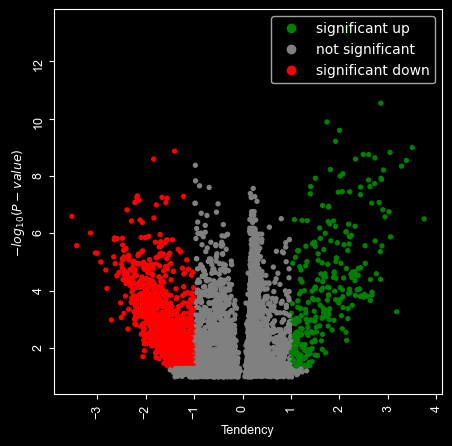

In [110]:
visuz.GeneExpression.volcano(df=withsexDF_sig, lfc='b_values', pv='p_values', show = True, theme = "dark", plotlegend=True, legendpos='upper right', axxlabel = "Tendency")

In [14]:
#change column names to only numbers
expression_df.rename(columns = {"male_10": 10, "male_11": 11, "male_12": 12, "male_13": 13, "male_14A" : 14, "male_14B": 14, "male_14C": 14, "male_14D":14, "female_10": 10, "female_11": 11, "female_12": 12, "female_13": 13, "female_14A": 14, "female_14B": 14, "female_14C": 14, "female_14D": 14}, inplace=True)
difexpdf = expression_df.iloc[:,:-1]
difexpdf

,10,11,12,13,14,14,14,14,10,11,12,13,14,14,14,14
gene_name,,,,,,,,,,,,,,,,
CR40182,4.573651,3.593093,4.383186,3.772605,4.240476,4.749679,4.518529,3.558602,4.459054,3.809626,4.051558,3.669331,4.995485,4.522507,3.851021,4.112914
Parp,3.472120,-3.321928,-3.321928,-3.321928,3.897757,-3.321928,4.145813,3.436875,-3.321928,-3.321928,3.905799,3.869772,4.353582,2.066050,-3.321928,4.665883
Alg-2,4.260622,-3.321928,3.900371,4.801878,4.484797,2.990301,3.801070,3.701063,4.222705,1.594158,4.209672,4.729653,4.784754,2.913181,2.897078,4.516802
Tim17b,2.681610,2.012708,2.665469,6.130167,6.072718,2.945977,6.230339,5.750615,5.486961,4.081859,5.728691,6.286330,6.338167,4.998373,5.621212,6.280001
Tim17b,6.899972,3.552258,6.909741,6.245611,6.188155,6.953605,6.345793,5.901059,5.602316,4.196805,5.844084,6.439396,6.453632,5.113628,5.736589,6.410012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mt:Cyt-b,5.063561,0.209330,3.312209,8.696872,6.681296,4.675181,6.166922,6.945737,6.905339,-0.371506,5.597221,6.170259,7.891809,5.452891,6.239269,7.386673
mt:ND1,4.661599,-0.437467,4.418274,9.014515,8.350559,5.778312,8.493319,7.797501,8.259794,1.172241,7.649749,8.615611,8.760742,4.441070,6.523595,9.412730
mt:lrRNA,11.191931,5.095088,9.857502,12.271701,11.136488,9.213941,11.283776,10.690080,11.332554,6.260317,11.087133,11.867576,6.942632,8.818194,9.435277,12.153787
